In [1]:
import pandas as pd
from pprint import pprint

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17) 
  
# data (as pandas dataframes) 
X = breast_cancer_wisconsin_diagnostic.data.features 
y = breast_cancer_wisconsin_diagnostic.data.targets

In [3]:
X.head()

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


1. Class Balance
2. Data Types

In [4]:
data = pd.concat([X, y], axis=1)
data.groupby('Diagnosis').size()

Diagnosis
B    357
M    212
dtype: int64

In [5]:
## Numeric vairables in the dataset

In [6]:
num_cols, cat_cols = X.select_dtypes(include=['number']).columns, X.select_dtypes(include=['object']).columns

In [7]:
data.describe()

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


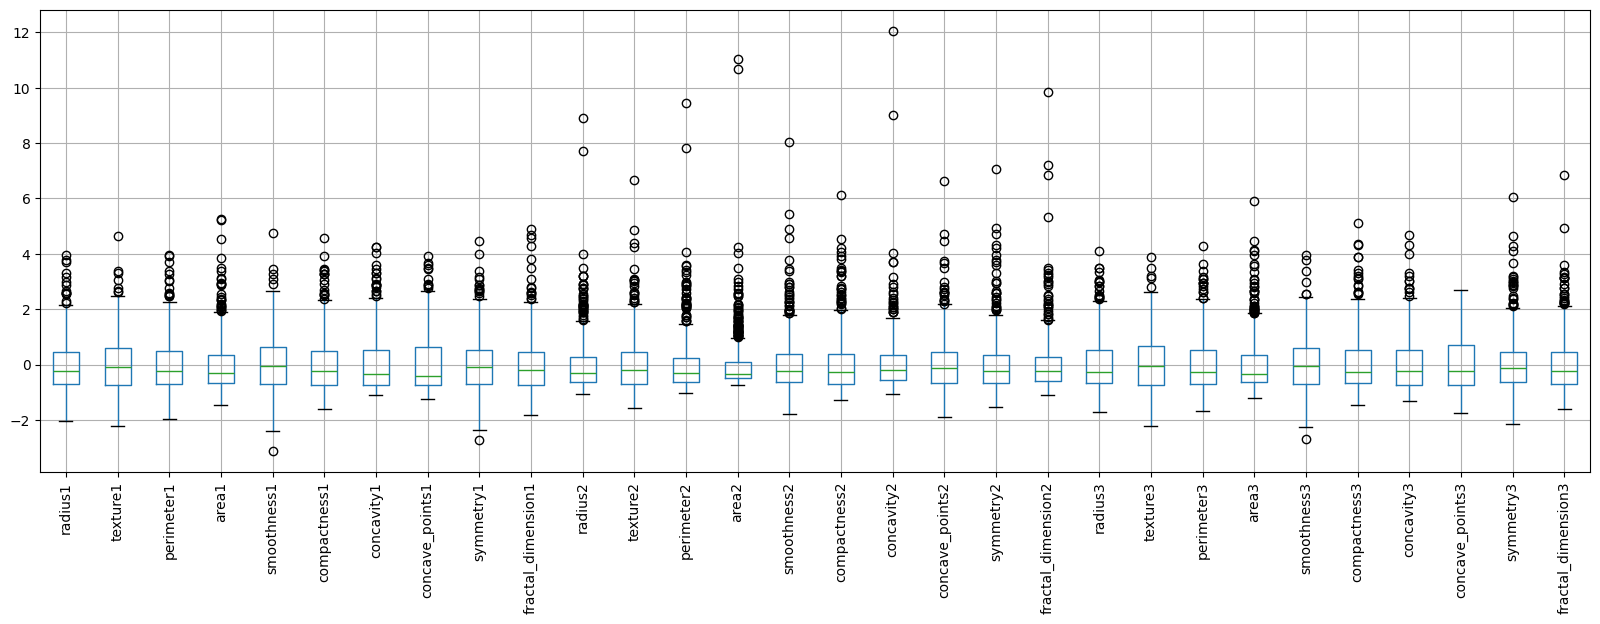

In [8]:
## Numeric columns

num = (X[num_cols] - X[num_cols].mean())/X[num_cols].std()
num.boxplot(figsize=(20, 6))
plt.xticks(rotation=90)
plt.show()

In [9]:
## Outliers - What percentage of numeric columns are outliers

outliers = {}

for col in num_cols:

    Q1 = X[col].quantile(0.25)
    Q3 = X[col].quantile(0.75)

    IQR = Q3 - Q1

    lower_bound = Q1 - (1.5 * IQR)
    upper_bound = Q3 + (1.5 * IQR)

    outliers[col] = round((len(X[(X[col] < lower_bound) | (X[col] > upper_bound)]) * 100)/ len(X), 2)

outliers

{'radius1': 2.46,
 'texture1': 1.23,
 'perimeter1': 2.28,
 'area1': 4.39,
 'smoothness1': 1.05,
 'compactness1': 2.81,
 'concavity1': 3.16,
 'concave_points1': 1.76,
 'symmetry1': 2.64,
 'fractal_dimension1': 2.64,
 'radius2': 6.68,
 'texture2': 3.51,
 'perimeter2': 6.68,
 'area2': 11.42,
 'smoothness2': 5.27,
 'compactness2': 4.92,
 'concavity2': 3.87,
 'concave_points2': 3.34,
 'symmetry2': 4.75,
 'fractal_dimension2': 4.92,
 'radius3': 2.99,
 'texture3': 0.88,
 'perimeter3': 2.64,
 'area3': 6.15,
 'smoothness3': 1.23,
 'compactness3': 2.81,
 'concavity3': 2.11,
 'concave_points3': 0.0,
 'symmetry3': 4.04,
 'fractal_dimension3': 4.22}

In [10]:
import warnings
warnings.filterwarnings("ignore")

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

from sklearn.metrics import recall_score

In [31]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2
)

X_train, X_val, y_train, y_val = train_test_split(
    X_train,
    y_train,
    test_size=0.1
)

In [33]:
len(X_train), len(X_val), len(X_test)

(409, 46, 114)

In [34]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', num_cols),  # Use numerical columns as-is
        ('cat', OneHotEncoder(), cat_cols)
    ]
)

models = [
    RandomForestClassifier(),
    XGBClassifier(verbosity=0, use_label_encoder=False)
]

parameters = [
    {
        'classifier__n_estimators': [10, 15, 20],
        'classifier__max_depth': [2, 3, 5, 7, 9] 
    },
    {
        'classifier__n_estimators': [10, 15, 20],
        'classifier__max_depth': [2, 3, 5, 7, 9] 
    }
]

In [35]:
best_pipeline = None
best_acc = 0

In [36]:
for model, params in zip(models, parameters):

    pipeline = Pipeline(
        steps=[
            ('preprocessor', preprocessor),
            ('classifier', model)
        ]
    )

    grid = GridSearchCV(
        estimator=pipeline,
        param_grid=params,
        cv=5,
        scoring='accuracy',
        n_jobs=-1
    )

    grid.fit(X_train, y_train)
    print(f"Best Pipeline : {grid.best_estimator_}")
    print(f"Train Score: {grid.best_score_}")

    val_score = recall_score(y_val, grid.best_estimator_.predict(X_val))
    print(f"Test Score: {val_score}")
    
    if val_score > best_recall:
        best_recall = val_score
        best_pipeline = grid.best_estimator_

print("=================================================")
print("Done!")
print(best_pipeline)

/Users/sreejithsreekumar/venvs/llms/lib/python3.10/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/sreejithsreekumar/venvs/llms/lib/python3.10/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/sreejithsreekumar/venvs/llms/lib/python3.10/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/sreejithsreekumar/venvs/llms/lib/python3.10/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y wa

Best Pipeline : Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', 'passthrough',
                                                  Index(['radius1', 'texture1', 'perimeter1', 'area1', 'smoothness1',
       'compactness1', 'concavity1', 'concave_points1', 'symmetry1',
       'fractal_dimension1', 'radius2', 'texture2', 'perimeter2', 'area2',
       'smoothness2', 'compactness2', 'concavity2', 'concave_points2',
       'symmetry2', 'fractal_dimension2', 'radius3', 'texture3', 'perimeter3',
       'area3', 'smoothness3', 'compactness3', 'concavity3', 'concave_points3',
       'symmetry3', 'fractal_dimension3'],
      dtype='object')),
                                                 ('cat', OneHotEncoder(),
                                                  Index([], dtype='object'))])),
                ('classifier',
                 RandomForestClassifier(max_depth=5, n_estimators=10))])
Train Score: 0.9706112616681721


hen a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/sreejithsreekumar/venvs/llms/lib/python3.10/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/sreejithsreekumar/venvs/llms/lib/python3.10/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/sreejithsreekumar/venvs/llms/lib/python3.10/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimato

ValueError: pos_label=1 is not a valid label. It should be one of ['B', 'M']